##### 1. Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

##### 2. Load DataSets to Pandas DataFrame

In [18]:
df = pd.read_csv('dataset/bmx.csv')

# เลือกเฉพาะคอลัมน์ที่ต้องการ แล้วทำการลบ missing value Nan ออก
df = df[['bmxleg', 'bmxwaist']].dropna()

df.info()

df


<class 'pandas.core.frame.DataFrame'>
Index: 6899 entries, 0 to 9337
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   bmxleg    6899 non-null   float64
 1   bmxwaist  6899 non-null   float64
dtypes: float64(2)
memory usage: 161.7 KB


,bmxleg,bmxwaist
0,40.2,81.0
2,40.3,64.6
3,40.5,80.1
4,42.1,86.7
5,31.0,59.8
...,...,...
9333,39.0,104.4
9334,39.4,79.0
9335,35.6,59.6
9336,32.9,106.6


##### 3. Create Model Object KMeanClustering

In [19]:
model = KMeans(n_clusters=4, random_state=0)

##### 4. Train Model

In [20]:
model.fit(df)

# Get the centroids
centroids = model.cluster_centers_

print('Centroids:\n', centroids)

d:\PythonDABCEL\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids:
 [[ 38.72615054  85.03612903]
 [ 38.60022548 124.05377678]
 [ 38.88927614 102.1411975 ]
 [ 36.04064872  67.30131125]]


##### 5. Prediction

In [21]:
#นำข้อมูลแต่ละตำแหน่งไปทำนายว่าอยู่กลุ่มใด
#ซึ่งจะได้ผลลัพธ์เป็นอาร์เรย์ของลำดับกลุ่มของข้อมูลแต่ละตำแหน่ง
clusters = model.predict(df)

#แสดงผลลัพธ์
print(clusters)

[0 3 0 ... 3 2 3]


##### 6.Plot Graph check Centroid

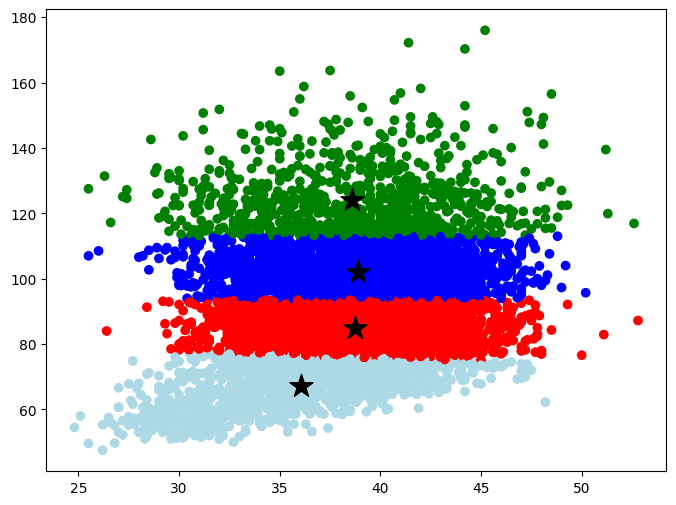

In [22]:
# กำหนดสีของแต่ละกลุ่ม (ตามค่า K หรือ n_clusters)
cluster_colors = ['red', 'green', 'blue', 'lightblue']

#เก็บสีของข้อมูลในแต่ละตำแหน่งตามกลุ่มของมัน
data_colors = []

for i in clusters:
    data_colors.append(cluster_colors[i])

# กำหนดขนาดของแต่ละจุดข้อมูล
plt.figure(figsize=(8, 6))

# วาดตำแหน่งข้อมูล โดยให้แกน X เป็นค่า bxmleg และแกน Y เป็น bmxwaist
plt.scatter(df['bmxleg'], df['bmxwaist'], color=data_colors)

# วาดตำแหน่ง centroids ของแต่ละกลุ่ม
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='black')

# แสดงผลลัพธ์
plt.show()

- จากลักษณะของจุด Centroid เราอาจใช้เป็นเกณฑ์ในการผลิตกางเกง ดังนี้
- กางเกงที่มีขนาดเอว 124 cm ควรมีความยาวของขาส่วนบน (Upper Leg) ประมาณ 38.6 cm
- กางเกงที่มีขนาดเอว 67.3 cm ควรมีความยาวของขาส่วนบน (Upper Leg) ประมาณ 36 cm

##### 7. Export the model

In [23]:
from joblib import dump

# Save the model as a pickle in a file
dump(model, 'bmx_kmean.joblib')

['bmx_kmean.joblib']